# 01 - King County House Sales - Exploratory Visual Analysis

### This notebook contains:
    01. Importing Libraries
    02. Importing Data
    03. Preparing Data
    04. Correlation Matrix Heatmap
    05. Scatterplots
    06. Pair Plots
    07. Categorical Plot
    08. Answering Questions
    09. Hypotheses
    10. Exporting Data

## 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## 02. Importing Data

In [2]:
# turning project folder path into string
path = r'/Users/lisa/DA Projects/01-2023 King County House Sales'

In [3]:
# importing house sale data
dfhs = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'kc_house_data_clean.csv'), index_col = False)

## 03. Preparing Data

In [4]:
# check
dfhs.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# creating sub without unneeded variables
sub=dfhs.drop(columns=['Unnamed: 0','id','date'])

In [6]:
# check
sub.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
sub.shape

(21596, 19)

## 04. Correlation Matrix Heatmap

In [8]:
# create pandas correlation matrix
sub.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315966,0.525915,0.701921,0.089885,0.256831,0.266438,0.397323,0.036000,0.667935,0.605395,0.323772,0.053995,0.126418,-0.053443,0.306772,0.022103,0.585273,0.082841
bedrooms,0.315966,1.000000,0.527870,0.593178,0.033602,0.183707,-0.006869,0.082437,0.023440,0.366174,0.492543,0.309261,0.160736,0.019160,-0.158588,-0.011595,0.136561,0.404532,0.031892
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063742,0.188381,-0.126443,0.665834,0.686664,0.283459,0.507166,0.050540,-0.204778,0.024301,0.224889,0.569878,0.088297
sqft_living,0.701921,0.593178,0.755755,1.000000,0.173449,0.353941,0.103853,0.284704,-0.059397,0.762776,0.876448,0.435152,0.318140,0.055303,-0.199793,0.052178,0.241200,0.756400,0.184337
sqft_lot,0.089885,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021631,0.074897,-0.008806,0.114726,0.184134,0.015424,0.052939,0.007684,-0.129582,-0.085507,0.230222,0.144756,0.718203
floors,0.256831,0.183707,0.502574,0.353941,-0.004824,1.000000,0.023752,0.028801,-0.264013,0.458783,0.523970,-0.245694,0.489175,0.006418,-0.059522,0.049280,0.125912,0.280072,-0.010734
waterfront,0.266438,-0.006869,0.063742,0.103853,0.021631,0.023752,1.000000,0.401970,0.016624,0.082886,0.072106,0.080562,-0.026157,0.092872,0.030274,-0.014302,-0.041908,0.086505,0.030780
view,0.397323,0.082437,0.188381,0.284704,0.074897,0.028801,0.401970,1.000000,0.046041,0.251722,0.167600,0.277090,-0.053649,0.103948,0.084629,0.005884,-0.078120,0.280674,0.072900
condition,0.036000,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016624,0.046041,1.000000,-0.146854,-0.158826,0.173801,-0.361555,-0.060772,0.002835,-0.015209,-0.105800,-0.092979,-0.003093
grade,0.667935,0.366174,0.665834,0.762776,0.114726,0.458783,0.082886,0.251722,-0.146854,1.000000,0.756069,0.168240,0.447854,0.014256,-0.185761,0.113602,0.200324,0.713863,0.120974


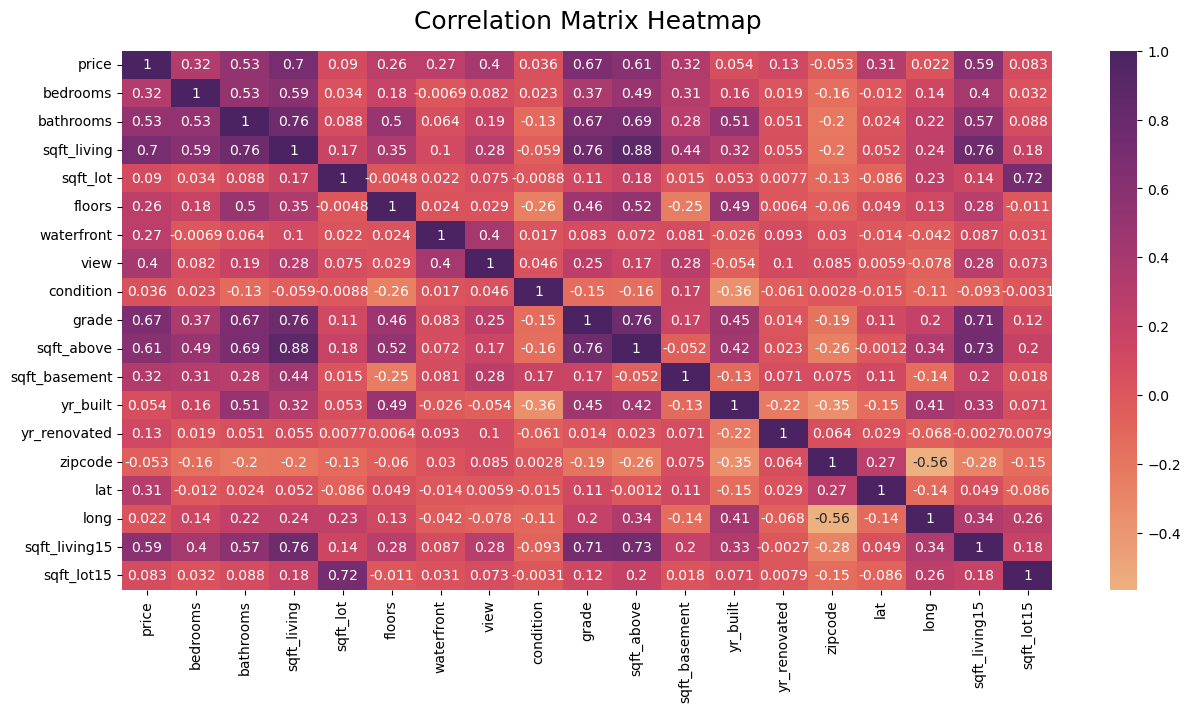

In [9]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(15,7))
# create correltaion heatmap 
heatmap = sns.heatmap(sub.corr(), annot = True, ax = ax, cmap='flare')
heatmap.set_title('Correlation Matrix Heatmap', fontdict={'fontsize':18}, pad=16)
figure = heatmap.get_figure()    
figure.savefig('correlheatmatrix.png', bbox_inches='tight', dpi=400)

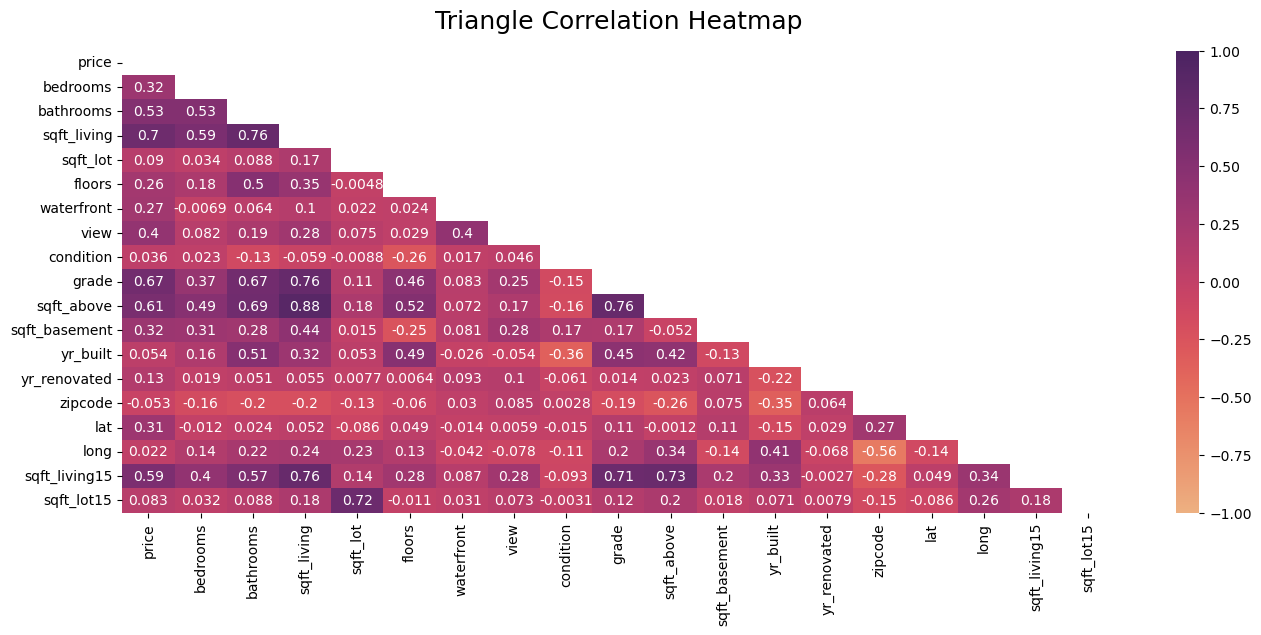

In [10]:
# create a triangle correlation heatmap for better readability
plt.figure(figsize=(16, 6))
# defining mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(sub.corr(), dtype=bool))
heatmap2 = sns.heatmap(sub.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='flare')
heatmap2.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
figure = heatmap2.get_figure()    
figure.savefig('trianglecorrelheat.png', bbox_inches='tight', dpi=400)

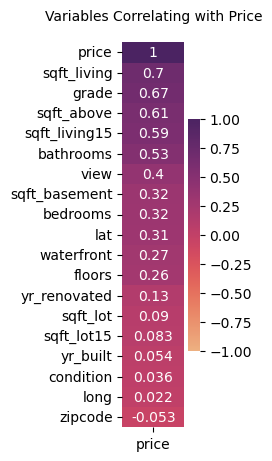

In [11]:
# taking a closer look at price variable
plt.figure(figsize=(1, 5))
heatmap3 = sns.heatmap(sub.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='flare')
heatmap3.set_title('Variables Correlating with Price', fontdict={'fontsize':10}, pad=16);
figure = heatmap3.get_figure()    
figure.savefig('correlheat_price.png', bbox_inches='tight', dpi=400)

The highest positive coefficient exists between sqft_above and sqft_living (0.88), which makes sense, because the bigger the overall size of a house (sqft_living), the bigger would be the size of the living space above ground level (sqft_above). 
There are similar relationships between all squarefoot related variables. The exception is sqft_basement, which still has a slighty positive coefficient with most sqft related variables, and a neutral to minimal negativ relationship with sqft_above. 
The size of the living space shows a postive correlation to the number of bedrooms and bathrooms. Again this makes sense, as the living space includes bath- & bedrooms as well and a bigger living space also means more bath- & bedrooms and less living space, less bath-& bedrooms.

Two of the most important variables are price and grade. They have a positive relationship to each other. The coefficient indicates that the higher (or lower) the grade, the higher (or lower) the price and vice versa. The correlation coefficients indicate that grade has a medium-strength relationship with price, number of bathrooms, sqft_living, sqft_above and living space of the 15 nearest houses, with sqft_living and sqft_above being the highest (0.76). 
Price has the strogest realtionship with the living space of a house (0.7). The bigger the house/living space the higher the price, while smaller living spaces have a lower price. Some of the other variables that are related to the size of a house (bedrooms, bathrooms, sqft_above, sqft_basement, sqft_living15) have a medium low to medium strength relationship. The coefficients of condition and sqft_lot with price show an almost non-existing linear relationship. 

## 05. Scatterplots

### sqft_above & sqft_living

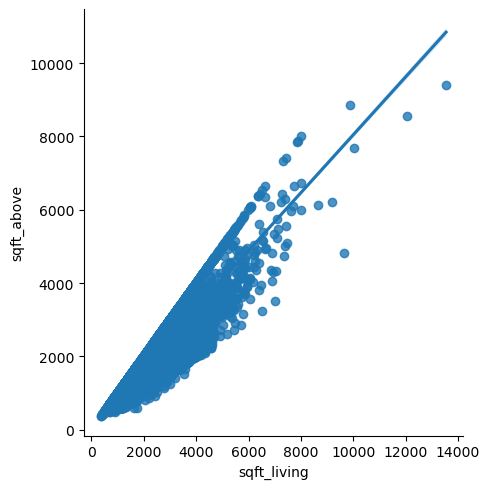

In [12]:
# Create a scatterplot for the "sqft_living" and "sqft_above" columns in seaborn
scatter1 = sns.lmplot(x = 'sqft_living', y = 'sqft_above', data = sub)
figure = scatter1.fig    
figure.savefig('scatter_sqft_above-sqftliving.png', bbox_inches='tight', dpi=400)

The scatterplot show a strong positive relationship where the data point stay close to the trend line. There are no major outliers. 

### price & sqft_living

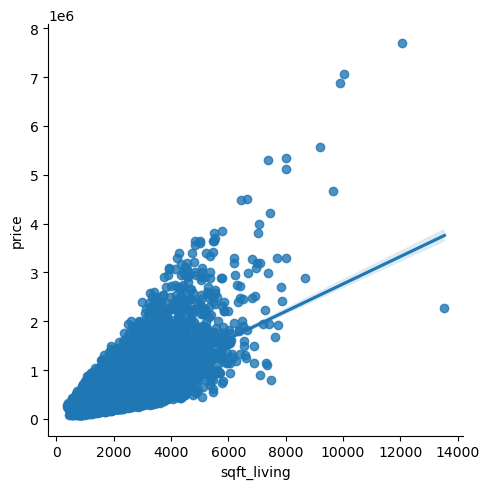

In [13]:
# Create a scatterplot for the "price" and "sqft_living" columns in seaborn
scatter2 = sns.lmplot(x = 'sqft_living', y = 'price', data = sub)
figure = scatter2.fig    
figure.savefig('scatter_price-sqftliving.png', bbox_inches='tight', dpi=400)

The scatterplot chart show a moderat positive relationship. As the living space increases so does the price. But the a good number of the data points are distanced from the trendline and almost form a second line that indicates a stronger positive relationship. Splitting the houses into two or more price categories could give more insight.

### price & grade

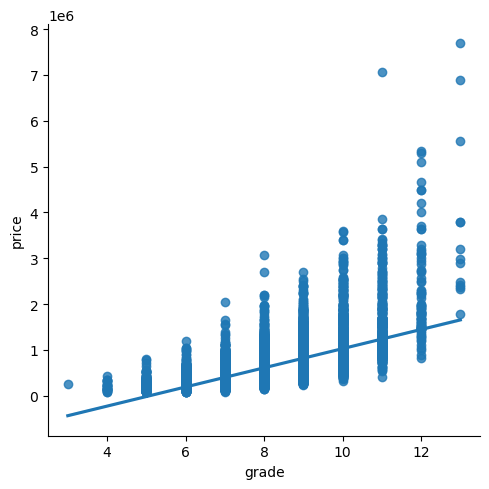

In [14]:
# Create a scatterplot for the "price" and "grade" columns in seaborn
scatter3 = sns.lmplot(x = 'grade', y = 'price', data = sub)
figure = scatter3.fig    
figure.savefig('scatter_grade-price.png', bbox_inches='tight', dpi=400)

The scatterplot indicates a medium strong positive relationship. A higher grade indicates a higher price. But the data points are spread wide from the trend line and depict more of a curve than a linial spread. There are some houses that have the grade category 13 (and one 11) and are especially high priced that could be considered outliers.

### grade & sqft_living

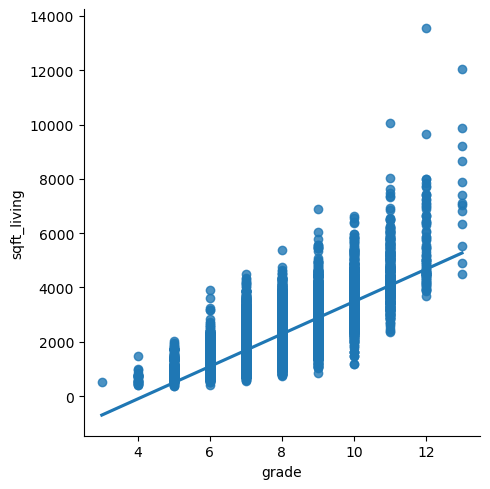

In [15]:
# Create a scatterplot for the "sqft_living" and "grade" columns in seaborn
scatter4 = sns.lmplot(x = 'grade', y = 'sqft_living', data = sub)
figure = scatter4.fig    
figure.savefig('scatter_grade-sqftliving.png', bbox_inches='tight', dpi=400)

Similar to grade & price, the scatterplot indicates a medium-strength positive relationship. Bigger living space indicates a higher grade category. Also like the scatterplot before, data points are spread out and depict more of a curve than a linear distribution. 

### Price & sqft_living15

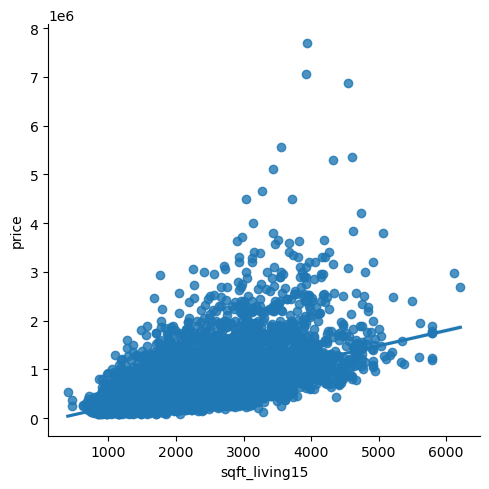

In [16]:
# Create a scatterplot for the "price" and "sqft_living15" columns in seaborn
scatter5 = sns.lmplot(x = 'sqft_living15', y = 'price', data = sub)
figure = scatter5.fig    
figure.savefig('scatter_price-sqftliving15.png', bbox_inches='tight', dpi=400)

The scatterplot shows a medium-strength positive relationship. The bigger the living space of the neighbouring houses the higher the price. Although, most data points are concentrated in the area under 200k and under 4000 sqft and, while wide spread from the line, follow the general trend. There is, however a cluster of data points between 200k and 400k as well as the high priced outliers that stand out. 

## 06. Pair Plots

In [17]:
# creating sub without unneeded variables
sub2=dfhs.drop(columns=['Unnamed: 0','id','date', 'lat', 'long','zipcode'])

In [18]:
# check
sub2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [19]:
# check 2
sub2.shape

(21596, 16)

In [20]:
#current dir
cwd = os.getcwd()
cwd

'/Users/lisa/DA Projects/01-2023 King County House Sales/03 Scripts'

In [21]:
# creating pair plot
pp = sns.pairplot(sub2)
pp.savefig("pairplot.png")

Error in callback <function flush_figures at 0x7f8e476d3f70> (for post_execute):


KeyboardInterrupt: 

In [22]:
# creating triangular pair plot for better readability
pp2 = sns.pairplot(sub2, corner=True)
pp2.savefig("pairplot2.png")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f8e476d3f70> (for post_execute):


KeyboardInterrupt: 

As stated before, I consider the price variable as the most important variable and want to get insights on what variables influence/affect/decide the price. Another important variable is the grade. I want to examine if and when yes, how the grade is calculated. The distribution od data points from grade with other variables indicates, that the grade is calculated (the existence or (more) quantity of a feature seems to result in a higher grade).

## 07. Categorical Plot

In [ ]:
# creating histogram for house price variable
hist=sns.histplot(dfhs['price'], bins = 20, kde = True)
figure = hist.get_figure()   
figure.savefig('hist_price_categories.png', bbox_inches='tight', dpi=400)

In [23]:
# creating price categories
dfhs.loc[dfhs['price'] < 500000, 'price_category'] = 'low price'
dfhs.loc[(dfhs['price'] >= 500000) & (dfhs['price'] < 1000000), 'price_category'] = 'medium price'
dfhs.loc[dfhs['price'] >= 1000000, 'price_category'] = 'high price'

In [24]:
# check results
dfhs.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,low price
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,medium price
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low price
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,medium price
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,medium price


In [25]:
dfhs['price_category'].value_counts()

low price       12394
medium price     7712
high price       1490
Name: price_category, dtype: int64

In [ ]:
# Create a categorical plot using price categories
sns.set(style="ticks")
catplot = sns.catplot(x='grade', y='price', hue='price_category', data=dfhs)
figure = hist.get_figure()   
figure.savefig('hist_price_categories.png', bbox_inches='tight', dpi=400)

As prefiously observed, the categorical plot indicates that houses with a higher grade have a higher price. The higher the grade the fewer houses are sold of the low and medium price category. Nonetheless, there were houses with higher grade in the two lower price categorie sold. Their characteristics will need to be investigated to identify a reason for that.

In [ ]:
# creating histogram for price categories
hist2=sns.histplot(dfhs['price_category'], bins = 20, kde = True)
figure = hist.get_figure()   
figure.savefig('hist_price_category2.png', bbox_inches='tight', dpi=400)

## 08. Answering Questions

#### A. How does the size of a house relate to its sale price?

The previous analysis results indicate, that the bigger the living space is, the higher is the house price. 

#### B. Does the condition and grade of the house affect its sale price?

The results support that a higher grade means a higher price.

#### C. Are houses with more bedrooms and bathrooms generally more expensive?

While the coefficient indicates a medium-low (bedrooms 0.32) to medium (bathrooms 0.53) strength positive realtionship, the scatterplot results show, that the highest house prices were reached for 5 and 6 bedrooms. After that eventhough the number of bedrooms grows, the price sinks. The number of bathrooms shows a more conclusive result. Generally a higher number means a higher price.

## 09. Hypotheses

If the squarefootage of the living space is high, the house sales price is high.

If the grade is high, the house sales price is high.

## 10. Exporting Data

In [26]:
# exporting dataframe with price category flag
dfhs.to_csv(os.path.join(path, '02 Data','Prepared Data', 'kc_house_data_price-cats.csv'))